## Example: EU indicators data

We will consider data on economic indicators for EU countries from [Greenacre (2012)](http://onlinelibrary.wiley.com/doi/10.1002/wics.1200/abstract). The variables correspond to: CPI, consumer price index (index = 100 in 2005); UNE, unemployment rate in 15–64 age group; INP, industrial production (index = 100 in 2005); BOP,
balance of payments; PRC, private final consumption expenditure; UN_perc, annual change in unemployment rate.

Countries,abbr,CPI,UNE,INP,BOP,PRC,UN_perc
Belgium,BE,116.03,4.77,125.59,908.6,6716.5,-1.6
Bulgaria,BG,141.20,7.31,102.39,27.8,1094.7,3.5
CzechRep.,CZ,116.20,4.88,119.01,-277.9,2616.4,-0.6
Denmark,DK,114.20,6.03,88.20,1156.4,7992.4,0.5
Germany,DE,111.60,4.63,111.30,499.4,6774.6,-1.3
Estonia,EE,135.08,9.71,111.50,153.4,2194.1,-7.7


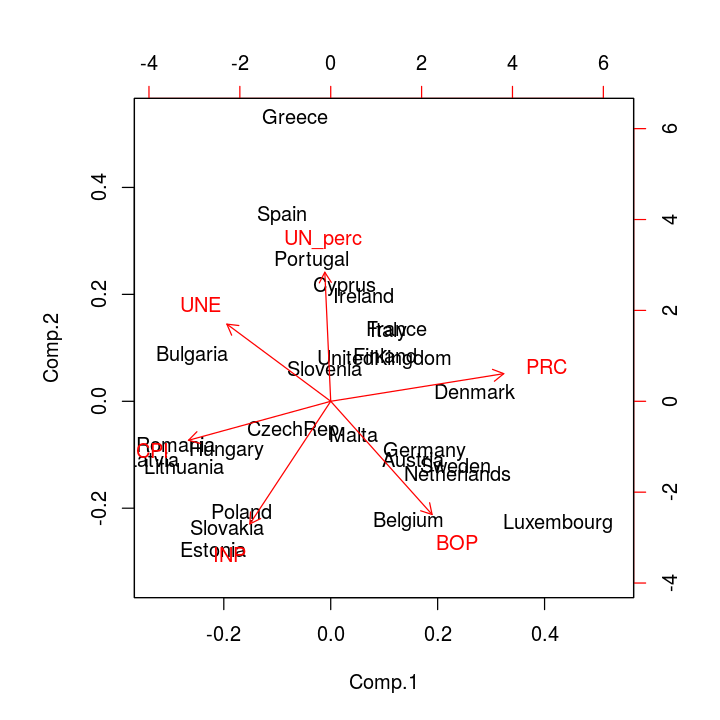

In [1]:
options(repr.plot.width=6, repr.plot.height=6)
eu<-read.csv('eu_indicators.csv',sep=' ')
head(eu) #inspect the data
#scale and inspect the biplot
dat<-scale(eu[,3:8])
rownames(dat)<-eu$Countries
biplot(princomp(dat))

### Visualising Hierarchical Clustering
_Levels_ in the dendrogram represent a dissimilarity between examples.

 * Tree dissimilarity $d^{T}_{ij}$ = minimum height in the tree at which examples $i$ and $j$ belong to the same cluster.
 * _ultrametric_ (stronger than triangle) inequality: $$d^T_{ij}\leq \max\{d^{T}_{ik},d^{T}_{kj}\}.$$
 * Hierarchical clustering can be interpreted as an approximation of a given dissimilarity $d_{ij}$ by an ultrametric dissimilarity.


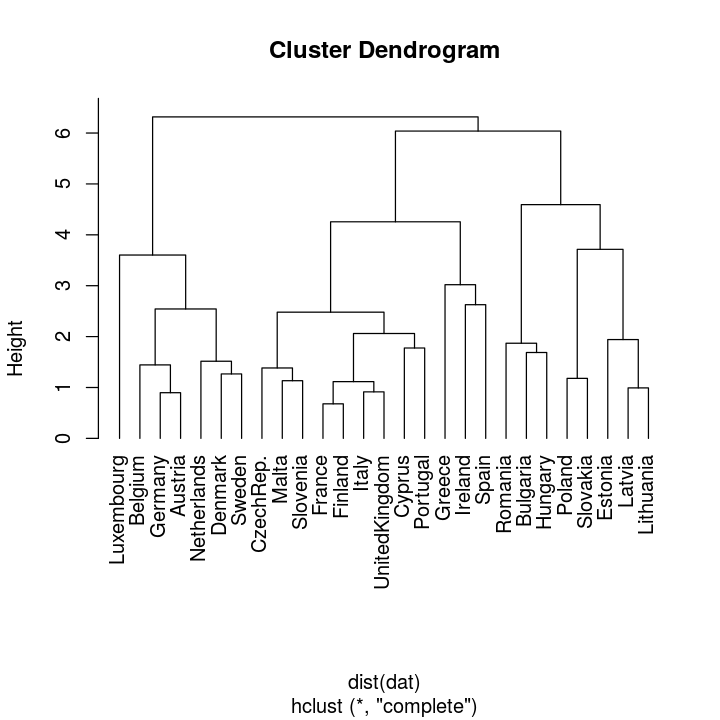

In [2]:
#perform hierarchical clustering and show the cluster dendrogram
hc<-hclust(dist(dat))  
plot(hc,hang=-1)

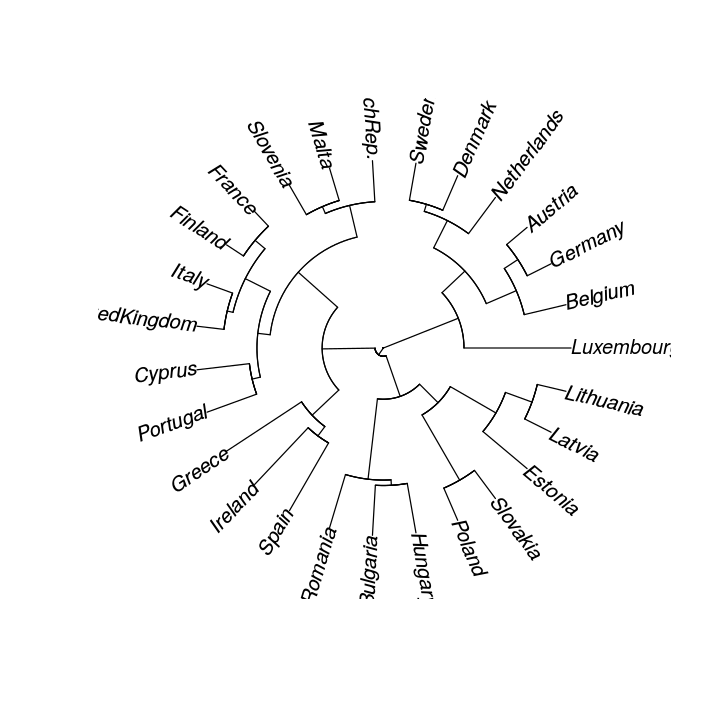

In [3]:
#additional visualisation tools available in library ape
library(ape)
plot(as.phylo(hc), type = "fan")

## Example: behaviour of different linkage methods
To join clusters $C_i$ and $C_j$ into super-clusters, we need a way to measure the dissimilarity $D(C_i,C_j)$ between them. Three most common choices are:
1. _Single Linkage_: 
    $$D(C_i,C_j)=\min_{x,y}\left(d(x,y)|x\in C_i,y\in C_j\right).$$ 
2. _Complete Linkage_: 
    $$D(C_i,C_j)=\max_{x,y}\left(d(x,y)|x\in C_i,y\in C_j\right).$$ 
3. _Average Linkage_: 
  $$D(C_i,C_j)=\text{avg}_{x,y}\left(d(x,y)|x\in C_i,y\in C_j\right).$$
  
Single linkage generally results in elongated, loosely connected clusters: it will have a tendency to include in the same cluster the items linked by a series of close intermediate observations. This is called _chaining_. 
Clusters in complete linkage tend to be more compact and have smaller diameters (largest distance among the cluster members).
Average linkage provides a balance between the two. Let us visualise behaviour of these different methods on an artifical dataset generated from a mixture of three 2-dimensional Gaussians.

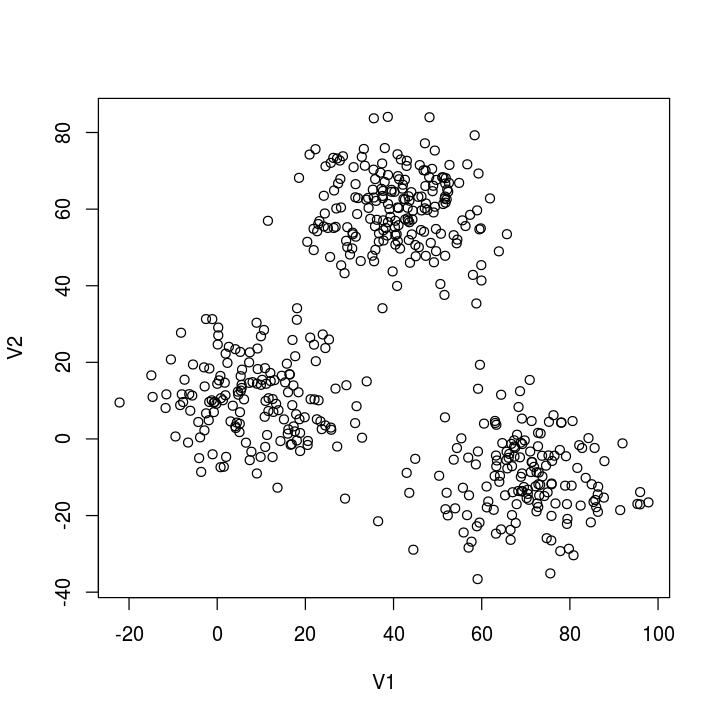

In [30]:
library(cluster)
dat=xclara[sample(dim(xclara)[1],500),]
#plot the data
plot(dat)

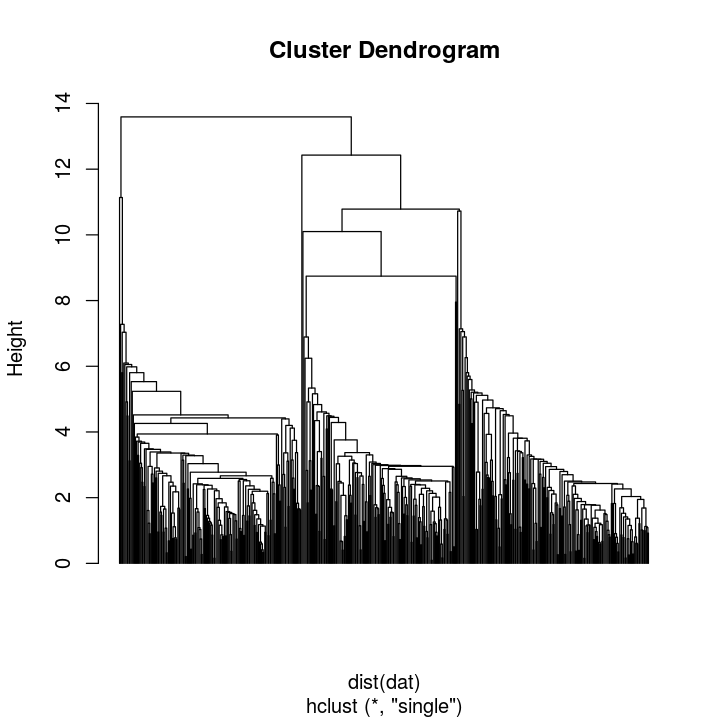

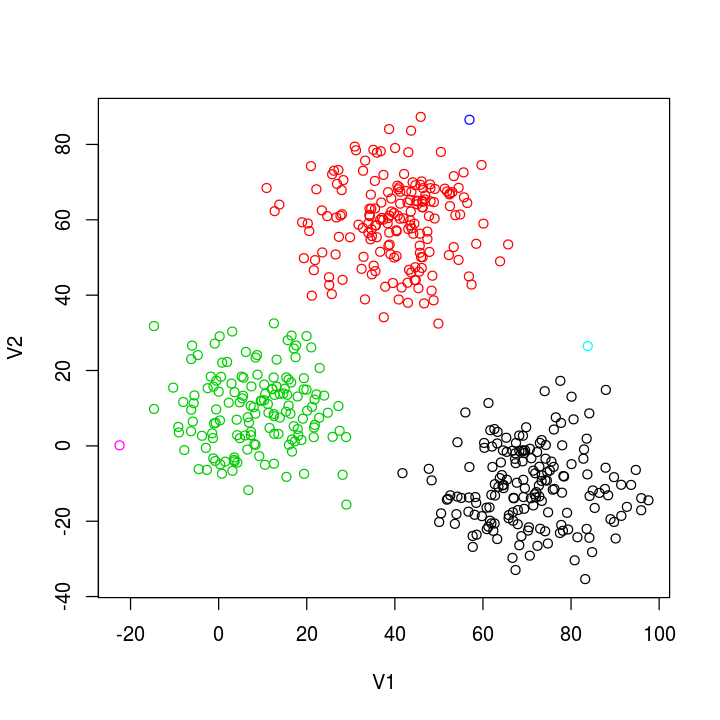

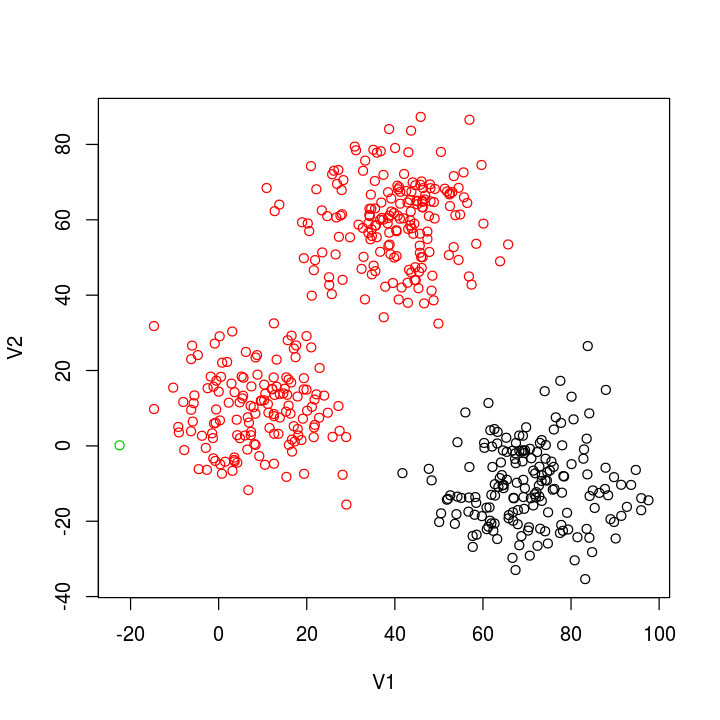

In [28]:
hcs<-hclust(dist(dat),method="single")
plot(hcs,hang=-1,labels = FALSE)

clusterlab <- cutree(hcs, 6)
plot(dat,col=clusterlab)
clusterlab <- cutree(hcs, 3)
plot(dat,col=clusterlab)

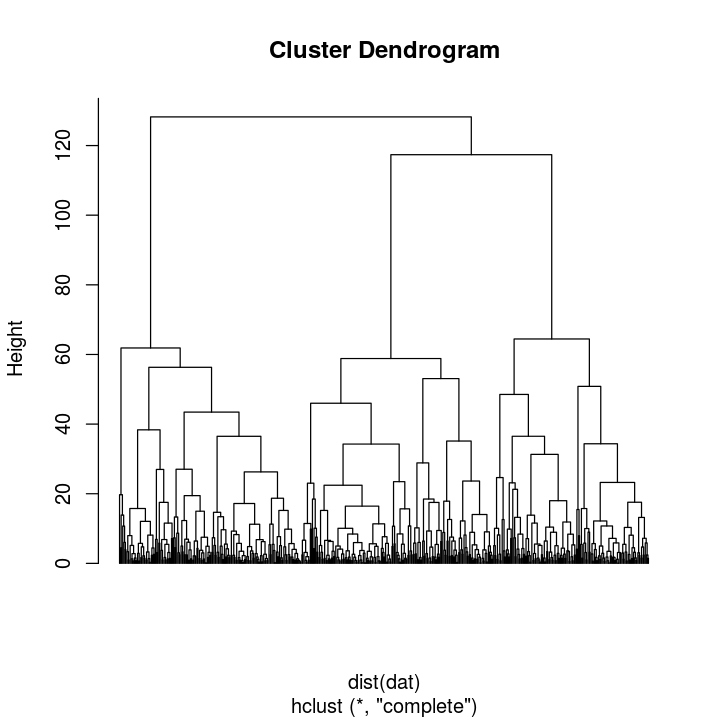

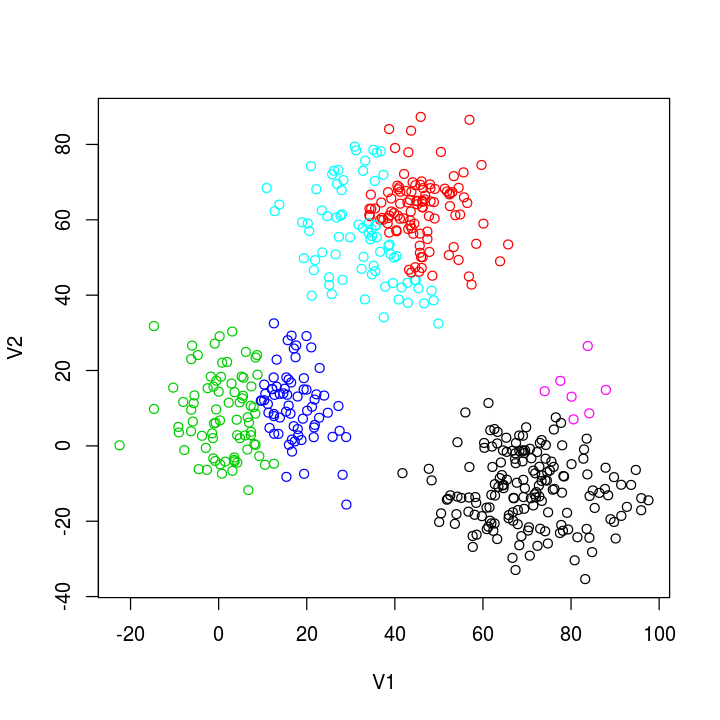

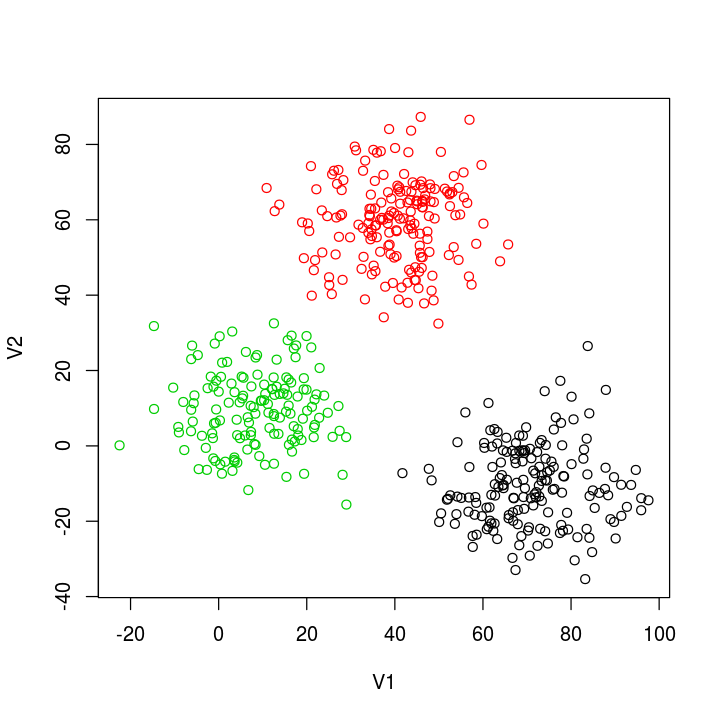

In [29]:
hcc<-hclust(dist(dat),method="complete")
plot(hcc,hang=-1,labels = FALSE)

clusterlab <- cutree(hcc, 6)
plot(dat,col=clusterlab)
clusterlab <- cutree(hcc, 3)
plot(dat,col=clusterlab)

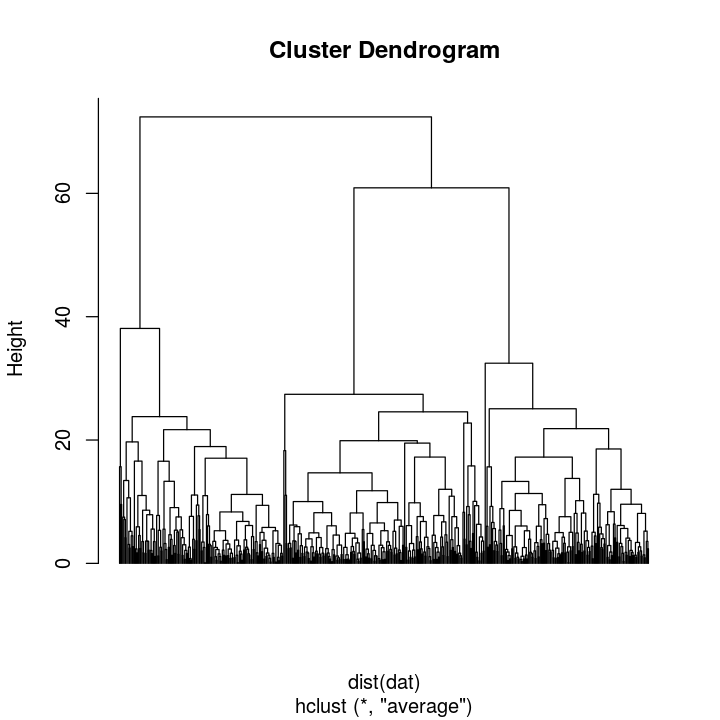

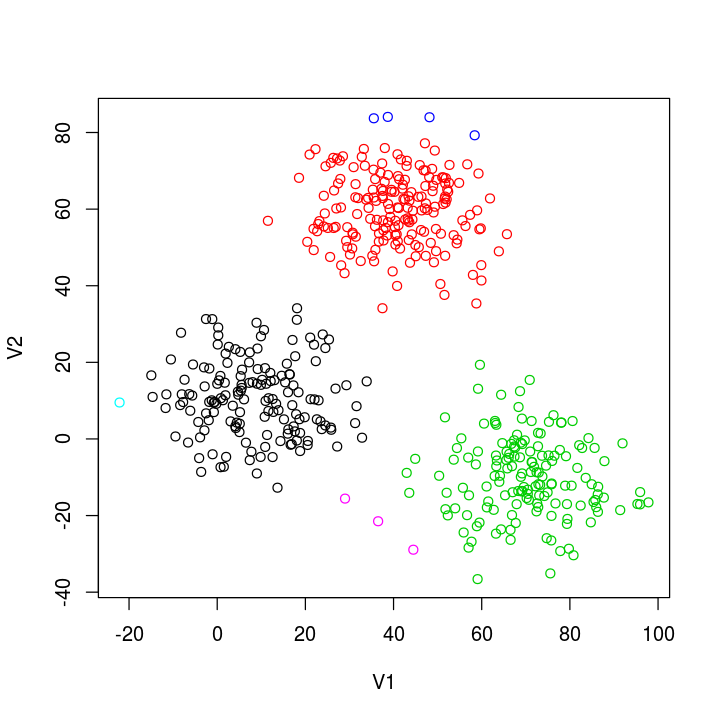

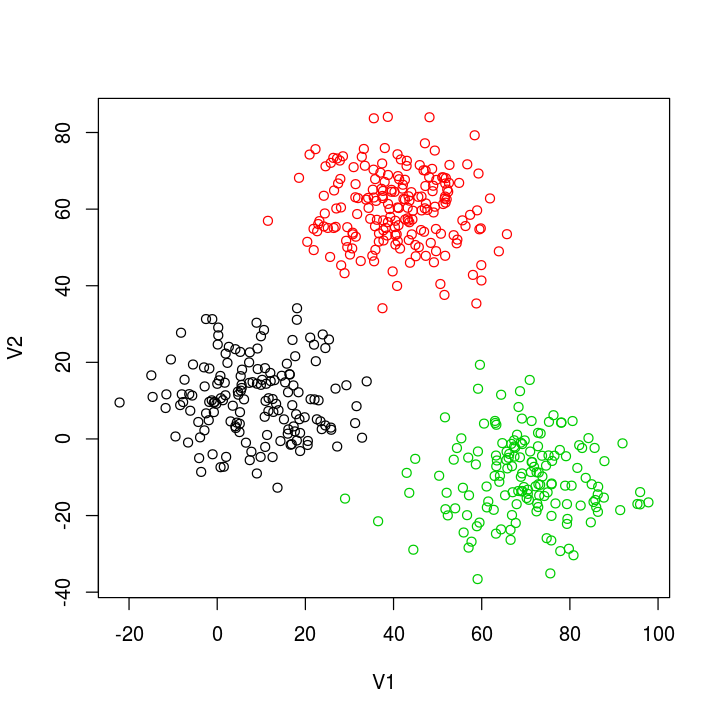

In [32]:
hca<-hclust(dist(dat),method="average")
plot(hca,hang=-1,labels = FALSE)

clusterlab <- cutree(hca, 6)
plot(dat,col=clusterlab)
clusterlab <- cutree(hca, 3)
plot(dat,col=clusterlab)